In [1]:
# Sample API
import flowx
import simulation
import numpy

In [2]:
# Define grid parameters
nx, ny = 40, 40

xmin, xmax = 0.0, 2.0 * numpy.pi
ymin, ymax = 0.0, 2.0 * numpy.pi

# Define cell-centered variable names
center_vars = ["pres", "delp", "divv", "asol", "eror"]
face_vars = ["velc", "hvar", "asol", "eror"]

ins_vars = ["velc", "hvar", "divv", "pres", "delp"]
poisson_vars = ["delp", "divv"]

scalar_info = dict(tmax=2, dt=0.001, Re=1.0)
simulation_info = dict(
    time_stepping="euler", poisson_solver="direct", maxiter=3000, pressure_correct=True
)

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_center = dict(delp=["neumann", "neumann", "neumann", "neumann"])
bc_val_center = dict(delp=[0.0, 0.0, 0.0, 0.0])

bc_type_facex = dict(velc=["dirichlet", "dirichlet", "dirichlet", "dirichlet"])
bc_val_facex = dict(velc=[0.0, 0.0, 0.0, 0.0])

bc_type_facey = dict(velc=["dirichlet", "dirichlet", "dirichlet", "dirichlet"])
bc_val_facey = dict(velc=[0.0, 0.0, 0.0, 0.0])

gridc, gridx, gridy, scalars, particles = flowx.domain.Domain(
    nx,
    ny,
    xmin,
    xmax,
    ymin,
    ymax,
    center_vars,
    face_vars,
    scalar_info,
    bc_type_center=bc_type_center,
    bc_val_center=bc_val_center,
    bc_type_facex=bc_type_facex,
    bc_val_facex=bc_val_facex,
    bc_type_facey=bc_type_facey,
    bc_val_facey=bc_val_facey,
)

domain_data_struct = [gridc, gridx, gridy, scalars, particles]

poisson = flowx.poisson.Poisson(gridc, poisson_vars, simulation_info)

imbound = flowx.imbound.ImBound()

ins = flowx.ins.IncompNS(
    poisson, imbound, domain_data_struct, ins_vars, simulation_info
)

In [3]:
simulation.update_bc_val(gridx, gridy, "velc", scalars.to)
simulation.get_initial(gridc, gridx, gridy, "velc", "pres")

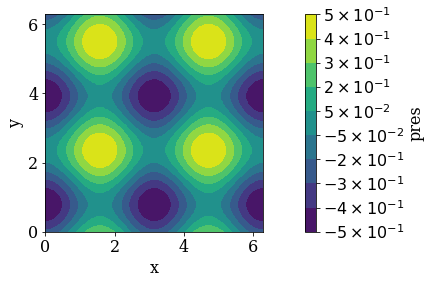

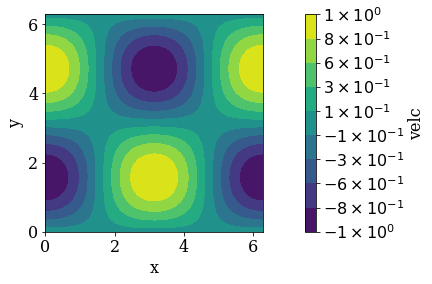

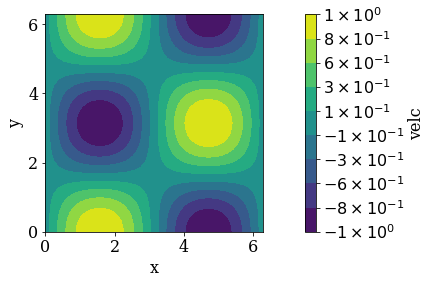

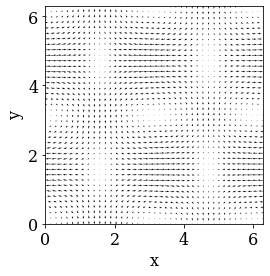

In [4]:
flowx.io.plot_contour(gridc, "pres")
flowx.io.plot_contour(gridx, "velc")
flowx.io.plot_contour(gridy, "velc")
flowx.io.plot_vector(gridx, gridy, "velc")

In [5]:
while scalars.time <= scalars.tmax:

    # Update the time-dependent boundary condition value
    simulation.update_bc_val(gridx, gridy, "velc", scalars.time)

    ins.advance()

    # Display stats
    if scalars.nstep % 10 == 0:
        flowx.io.display_stats(scalars)

    scalars.advance()

------------ Time = 0.0 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.353189162743653e-13
Total poisson time : 0.002820730209350586
Total INS time : 0.004273176193237305
Max, Min, U   : 0.9969173337331281, -0.996917333733128
Max, Min, V   : 0.996917333733128, -0.9969173337331281
Max, Min, P   : 1.1502684131799197, -1.9675644721562635
Max, Min, DIV : 8.881784197001252e-16, -8.881784197001252e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.010000000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.716163318756208e-13
Total poisson time : 0.0024840831756591797
Total INS time : 0.0032401084899902344
Max, Min, U   : 0.9771770479217199, -0.9771770479217198
Max, Min, V   : 0.9771770479217198, -0.9771770479217199
Max, Min, P   : 1.0483152036278833, 0.023283832967913698
Max, Min, DIV : 7.216449660063518e-16, -7.771561172376096e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.02000000000000001 ---------------


------------ Time = 0.18000000000000013 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2282618197187433e-13
Total poisson time : 0.0024902820587158203
Total INS time : 0.003272533416748047
Max, Min, U   : 0.6955256227954566, -0.6955256227954565
Max, Min, V   : 0.6955256227954565, -0.6955256227954566
Max, Min, P   : 16.688854091605585, 16.130784211003196
Max, Min, DIV : 6.938893903907228e-16, -7.216449660063518e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.19000000000000014 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.533967954726255e-13
Total poisson time : 0.0024871826171875
Total INS time : 0.003225564956665039
Max, Min, U   : 0.6817532927149613, -0.6817532927149612
Max, Min, V   : 0.6817532927149612, -0.6817532927149613
Max, Min, P   : 15.81347016523029, 15.27420620315606
Max, Min, DIV : 6.938893903907228e-16, -6.661338147750939e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.20000000000000015 ------

------------ Time = 0.36000000000000026 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.910421635149233e-13
Total poisson time : 0.0025022029876708984
Total INS time : 0.003267526626586914
Max, Min, U   : 0.4852517612001998, -0.48525176120019975
Max, Min, V   : 0.48525176120019975, -0.4852517612001998
Max, Min, P   : 10.338234774068587, 10.026390212614395
Max, Min, DIV : 4.440892098500626e-16, -3.608224830031759e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.3700000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.5372346117719973e-13
Total poisson time : 0.0024690628051757812
Total INS time : 0.003210783004760742
Max, Min, U   : 0.47564313254820223, -0.4756431325482022
Max, Min, V   : 0.4756431325482022, -0.47564313254820223
Max, Min, P   : 9.61760348174785, 9.314917500598373
Max, Min, DIV : 3.885780586188048e-16, -3.885780586188048e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.3800000000000003 --

------------ Time = 0.5400000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1428806408911604e-13
Total poisson time : 0.0024878978729248047
Total INS time : 0.003230571746826172
Max, Min, U   : 0.3385486659736526, -0.3385486659736526
Max, Min, V   : 0.3385486659736526, -0.3385486659736526
Max, Min, P   : 9.058541869534118, 8.84437900551477
Max, Min, DIV : 3.3306690738754696e-16, -3.3306690738754696e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.5500000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4660174402657988e-13
Total poisson time : 0.002473592758178711
Total INS time : 0.0032083988189697266
Max, Min, U   : 0.33184495323714613, -0.33184495323714613
Max, Min, V   : 0.33184495323714613, -0.33184495323714613
Max, Min, P   : 9.503737112865835, 9.29182038038355
Max, Min, DIV : 3.0531133177191805e-16, -3.469446951953614e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.5600000000000004 --

------------ Time = 0.7200000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.693228040336687e-14
Total poisson time : 0.002536773681640625
Total INS time : 0.0032775402069091797
Max, Min, U   : 0.23619738947274657, -0.23619738947274654
Max, Min, V   : 0.23619738947274654, -0.23619738947274657
Max, Min, P   : 9.61400035151862, 9.429284140139679
Max, Min, DIV : 1.942890293094024e-16, -1.942890293094024e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.7300000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.01250193287884e-14
Total poisson time : 0.002489805221557617
Total INS time : 0.0032815933227539062
Max, Min, U   : 0.23152036779970514, -0.2315203677997051
Max, Min, V   : 0.2315203677997051, -0.23152036779970514
Max, Min, P   : 10.118008549252547, 9.934389961586012
Max, Min, DIV : 2.220446049250313e-16, -1.8041124150158794e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.7400000000000005 ---

------------ Time = 0.9000000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1198269009536177e-13
Total poisson time : 0.0025353431701660156
Total INS time : 0.003306150436401367
Max, Min, U   : 0.16478932691491419, -0.16478932691491419
Max, Min, V   : 0.16478932691491419, -0.16478932691491419
Max, Min, P   : 10.397812992057876, 10.227487584903642
Max, Min, DIV : 1.734723475976807e-16, -1.8041124150158794e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.9100000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5753676524999893e-13
Total poisson time : 0.0024967193603515625
Total INS time : 0.003295421600341797
Max, Min, U   : 0.16152627961711208, -0.16152627961711208
Max, Min, V   : 0.16152627961711208, -0.16152627961711208
Max, Min, P   : 10.524902942919335, 10.355113764879368
Max, Min, DIV : 1.5265566588595902e-16, -1.6653345369377348e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.920000000

------------ Time = 1.0799999999999919 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.876606021317312e-14
Total poisson time : 0.0025606155395507812
Total INS time : 0.003304719924926758
Max, Min, U   : 0.11496961217771744, -0.11496961217771742
Max, Min, V   : 0.11496961217771742, -0.11496961217771744
Max, Min, P   : 10.469380671706679, 10.30609576447772
Max, Min, DIV : 9.020562075079397e-17, -9.020562075079397e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.0899999999999908 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.648053495451043e-14
Total poisson time : 0.0025148391723632812
Total INS time : 0.003257274627685547
Max, Min, U   : 0.11269306132719106, -0.11269306132719105
Max, Min, V   : 0.11269306132719105, -0.11269306132719106
Max, Min, P   : 10.326496376597012, 10.163474541686364
Max, Min, DIV : 9.020562075079397e-17, -9.71445146547012e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.0999999999999897

------------ Time = 1.259999999999972 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0626491268879103e-13
Total poisson time : 0.0024433135986328125
Total INS time : 0.0031757354736328125
Max, Min, U   : 0.08021157663396436, -0.08021157663396435
Max, Min, V   : 0.08021157663396435, -0.08021157663396436
Max, Min, P   : 9.470302618192228, 9.310475492557726
Max, Min, DIV : 8.326672684688674e-17, -8.673617379884035e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.269999999999971 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.667039309191069e-14
Total poisson time : 0.002565622329711914
Total INS time : 0.0033004283905029297
Max, Min, U   : 0.07862328100045517, -0.07862328100045515
Max, Min, V   : 0.07862328100045515, -0.07862328100045517
Max, Min, P   : 9.28723617028569, 9.127538465712124
Max, Min, DIV : 8.673617379884035e-17, -9.020562075079397e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.2799999999999698 --

------------ Time = 1.4399999999999522 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.067827311705045e-14
Total poisson time : 0.0025343894958496094
Total INS time : 0.0036144256591796875
Max, Min, U   : 0.05596637448826263, -0.055966374488262624
Max, Min, V   : 0.055966374488262624, -0.05596637448826263
Max, Min, P   : 8.471440130532665, 8.313316566248764
Max, Min, DIV : 4.5102810375396984e-17, -4.5102810375396984e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.449999999999951 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7044220454135368e-14
Total poisson time : 0.0024662017822265625
Total INS time : 0.003202676773071289
Max, Min, U   : 0.05485888121958652, -0.054858881219586514
Max, Min, V   : 0.05485888121958651, -0.05485888121958652
Max, Min, P   : 8.614281723728432, 8.456222066020064
Max, Min, DIV : 4.85722573273506e-17, -4.85722573273506e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.45999999999995

------------ Time = 1.6199999999999324 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.167898648588337e-14
Total poisson time : 0.002473115921020508
Total INS time : 0.0032088756561279297
Max, Min, U   : 0.039056076454556325, -0.03905607645455632
Max, Min, V   : 0.03905607645455632, -0.039056076454556325
Max, Min, P   : 8.005425380843052, 7.848144622683759
Max, Min, DIV : 4.336808689942018e-17, -3.8163916471489756e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.6299999999999313 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7607235390846865e-14
Total poisson time : 0.0024995803833007812
Total INS time : 0.0032417774200439453
Max, Min, U   : 0.03828327249866815, -0.03828327249866815
Max, Min, V   : 0.03828327249866814, -0.038283272498668156
Max, Min, P   : 8.176189451132725, 8.018940402779158
Max, Min, DIV : 4.163336342344337e-17, -3.8163916471489756e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.63999999999

------------ Time = 1.7999999999999126 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.2810344969999074e-14
Total poisson time : 0.002460956573486328
Total INS time : 0.0031969547271728516
Max, Min, U   : 0.02725605689691775, -0.027256056896917746
Max, Min, V   : 0.027256056896917746, -0.02725605689691775
Max, Min, P   : 8.270443594934711, 8.113582055803045
Max, Min, DIV : 2.2551405187698492e-17, -2.42861286636753e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.8099999999999115 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1116457044223645e-14
Total poisson time : 0.002453327178955078
Total INS time : 0.003192901611328125
Max, Min, U   : 0.026716788220747925, -0.02671678822074792
Max, Min, V   : 0.026716788220747925, -0.026716788220747925
Max, Min, P   : 8.18734061326996, 8.030494905943511
Max, Min, DIV : 2.2551405187698492e-17, -2.2551405187698492e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.81999999999

------------ Time = 1.9799999999998927 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1723620421210752e-15
Total poisson time : 0.0024645328521728516
Total INS time : 0.003201723098754883
Max, Min, U   : 0.019021834890887882, -0.01902183489088788
Max, Min, V   : 0.019021834890887882, -0.019021834890887882
Max, Min, P   : 8.101558834753654, 7.944907240736859
Max, Min, DIV : 2.0816681711721685e-17, -2.168404344971009e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.9899999999998916 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3637033764888838e-14
Total poisson time : 0.0024564266204833984
Total INS time : 0.0031974315643310547
Max, Min, U   : 0.018645520895189057, -0.018645520895189054
Max, Min, V   : 0.018645520895189057, -0.018645520895189057
Max, Min, P   : 8.16501862825702, 8.008374999320907
Max, Min, DIV : 2.0816681711721685e-17, -1.973247953923618e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.9999999

In [6]:
simulation.get_analytical(gridc, gridx, gridy, "asol", scalars.time)

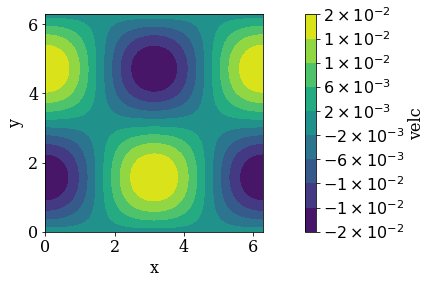

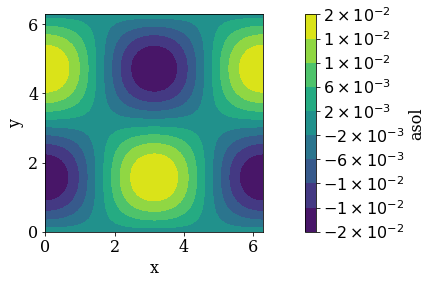

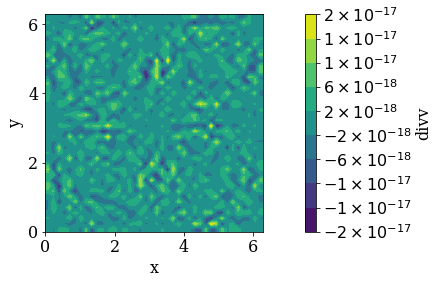

In [7]:
flowx.io.plot_contour(gridx, "velc")
flowx.io.plot_contour(gridx, "asol")
flowx.io.plot_contour(gridc, "divv")

In [8]:
gridx.compute_error("eror", "velc", "asol")
gridy.compute_error("eror", "velc", "asol")

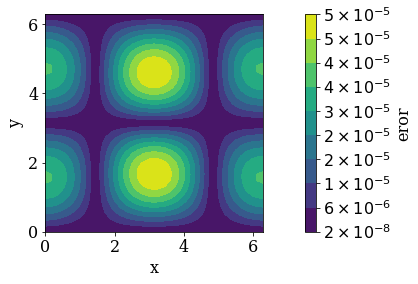

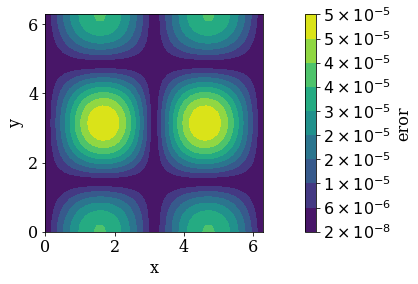

In [9]:
flowx.io.plot_contour(gridx, "eror")
flowx.io.plot_contour(gridy, "eror")